In [26]:
#random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Dataset Description and Exploration

# Load the dataset
data = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Display general information about the dataset
print("Dataset Information:")
print(data.info())
print("------------------------------------")
# Explore the distribution of classes
class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)
print("------------------------------------")

# Display statistical summary of the dataset
print("\nDataset Summary:")
print(data.describe())

print("\n")
print("------------------------------------")
#check for null values
print("\nCheck for null values: ",data.isnull().sum())

# Step 2: Data Preparation and Preprocessing

# Split the dataset into features and labels
X = data.drop('Class', axis=1)
y = data['Class']




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  obje

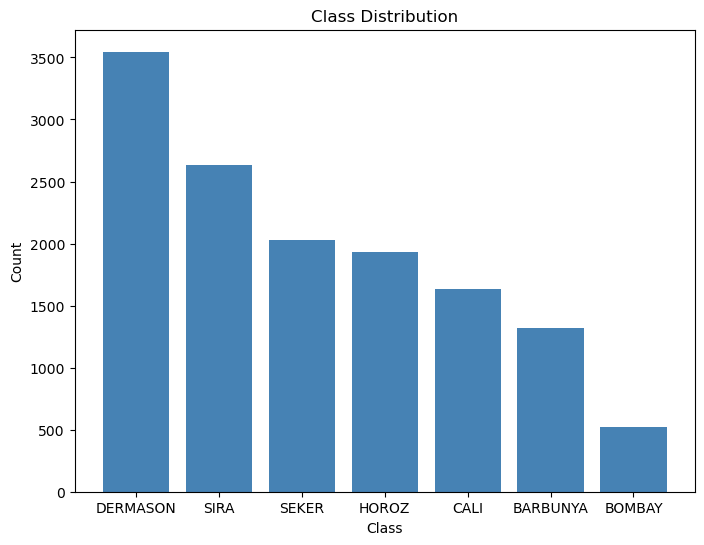

In [17]:
import matplotlib.pyplot as plt

# Plot the distribution of classes
class_counts = data['Class'].value_counts()
class_names = class_counts.index.tolist()
class_counts = class_counts.tolist()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(class_names, class_counts, color='steelblue')
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()


In [11]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Development and Training

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Precision: 0.9259938390115195
Recall: 0.9254498714652957
F1-Score: 0.9256049604860628
Accuracy: 0.9254498714652957
------------------------------------


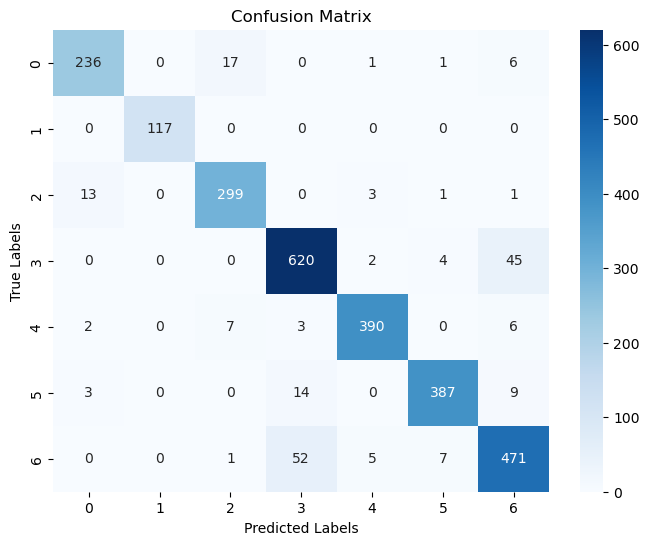

In [33]:
# Evaluate the model on the test set
y_pred = classifier.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the values
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("------------------------------------")

# Generate classification output file
output = pd.DataFrame({'ID': X_test.index, 'Predicted_Class': y_pred})
output.to_excel('classification_output.xlsx', index=False)

# Step 5: Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



Precision: 0.934378012431156
Recall: 0.9338964377524789
F1-Score: 0.9340797731137063
Accuracy: 0.9338964377524789
------------------------------------


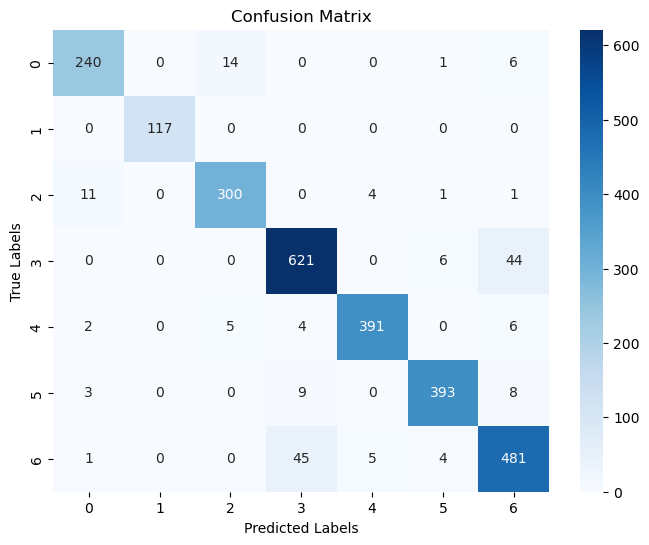

In [34]:
#SVM

from sklearn.svm import SVC

# Step 5: Development and Evaluation of Additional Automatic Detection Model

# Train an additional model (SVM)
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Step 6: Annotated Code and Classification Output

# Evaluate the additional model on the test set
svm_y_pred = svm_classifier.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, svm_y_pred, average='weighted')
recall = recall_score(y_test, svm_y_pred, average='weighted')
f1 = f1_score(y_test, svm_y_pred, average='weighted')

# Print the values
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", accuracy)
print("------------------------------------")

# Generate additional classification output file for the SVM model
svm_output = pd.DataFrame({'ID': X_test.index, 'Predicted_Class': svm_y_pred})
svm_output.to_excel('svm_classification_output.xlsx', index=False)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, svm_y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



Precision: 0.8931608025642562
Recall: 0.8927653323540213
F1-Score: 0.9256049604860628
Accuracy: 0.8927653323540213
------------------------------------


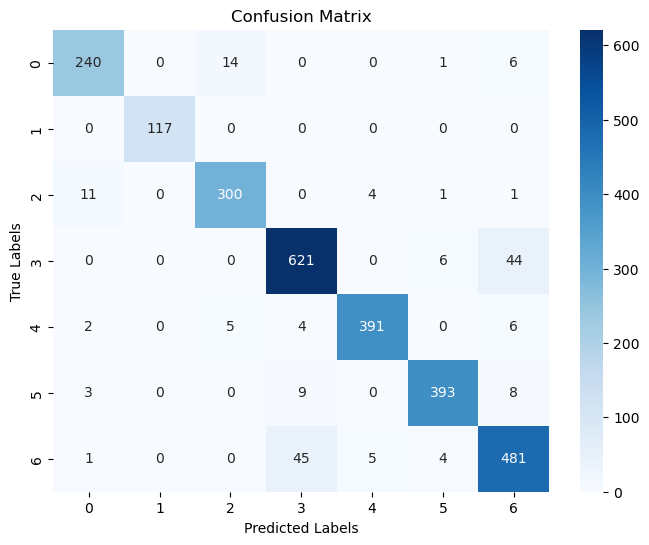

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Evaluate the additional model on the test set
dt_y_pred = dt_classifier.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, dt_y_pred, average='weighted')
recall = recall_score(y_test, dt_y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the values
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy:", accuracy)
print("------------------------------------")

# Generate additional classification output file for the SVM model
dt_output = pd.DataFrame({'ID': X_test.index, 'Predicted_Class': dt_y_pred})
dt_output.to_excel('dt_classification_output.xlsx', index=False)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, svm_y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
